In [1]:
import pandas as pd
#import matplotlib.pyplot as plt
#df1 = pd.read_csv('All_Info_2_processing.csv')
#df2 = pd.read_csv('All_Info_processing.csv')

In [2]:
df = pd.read_csv('All_Info_processing_200k_1m500k.csv')

In [3]:
df[['long_lat', 'area', 'price','n_bathrooms','n_bedrooms', 'stations', 'type']].dropna()

,long_lat,area,price,n_bathrooms,n_bedrooms,stations,type
0,51.5145899_-0.1636312,4764.0,"£9,250,000Knowing the purchase price means you...",×6,×5,Marble Arch Station0.2 milesEdgware Road (Circ...,Terraced
1,51.5144767_-0.2078933,560.0,"£500,000Knowing the purchase price means you c...",×1,×1,Ladbroke Grove Station0.1 milesLatimer Road St...,Flat
2,51.5253947_-0.1841597,978.0,"£1,175,000Knowing the purchase price means you...",×2,×2,Warwick Avenue Station0.2 milesMaida Vale Stat...,Flat
3,51.4396143_-0.1313659,2196.0,"£1,250,000Knowing the purchase price means you...",×3,×5,Streatham Hill Station0.3 milesStreatham Stati...,Semi-Detached
4,51.4666911_-0.0985873,1057.0,"£750,000Knowing the purchase price means you c...",×1,×3,Loughborough Junction Station0.2 milesDenmark ...,End of Terrace
...,...,...,...,...,...,...,...
8332,51.6675773_-0.1003563,885.0,"£500,000Knowing the purchase price means you c...",×1,×2,Enfield Chase Station0.2 milesGrange Park Stat...,Maisonette
8333,51.571759_-0.2106776,840.0,"£500,000Knowing the purchase price means you c...",×2,×2,Cricklewood Station0.7 milesGolders Green Stat...,Flat
8334,51.5316267_-0.0365744,408.0,"£330,000Knowing the purchase price means you c...",×1,×1,Mile End Station0.5 milesBow Road Station0.6 m...,Flat
8335,51.5595498_-0.119304,1569.0,"£1,150,000Knowing the purchase price means you...",×2,×5,Holloway Road Station0.5 milesUpper Holloway S...,Semi-Detached


In [4]:
dfsel = df[['long_lat', 'area', 'price','n_bathrooms','n_bedrooms', 'stations', 'type']].dropna()

In [5]:
dfsel['price']

0       £9,250,000Knowing the purchase price means you...
1       £500,000Knowing the purchase price means you c...
2       £1,175,000Knowing the purchase price means you...
3       £1,250,000Knowing the purchase price means you...
4       £750,000Knowing the purchase price means you c...
                              ...                        
8332    £500,000Knowing the purchase price means you c...
8333    £500,000Knowing the purchase price means you c...
8334    £330,000Knowing the purchase price means you c...
8335    £1,150,000Knowing the purchase price means you...
8336    £2,600,000Knowing the purchase price means you...
Name: price, Length: 8007, dtype: object

In [6]:
dfsel['price']

0       £9,250,000Knowing the purchase price means you...
1       £500,000Knowing the purchase price means you c...
2       £1,175,000Knowing the purchase price means you...
3       £1,250,000Knowing the purchase price means you...
4       £750,000Knowing the purchase price means you c...
                              ...                        
8332    £500,000Knowing the purchase price means you c...
8333    £500,000Knowing the purchase price means you c...
8334    £330,000Knowing the purchase price means you c...
8335    £1,150,000Knowing the purchase price means you...
8336    £2,600,000Knowing the purchase price means you...
Name: price, Length: 8007, dtype: object

In [7]:
# get distance stations
import numpy as np
import re
def min_distance(s):
    distance_strings = re.findall('\d.\d', s.lower())
    distances = np.array([float(x) for x in distance_strings])
    return np.min(distances)

def mean_distance(s):
    distance_strings = re.findall('\d.\d', s.lower())
    distances = np.array([float(x) for x in distance_strings])
    return np.mean(distances)

def price(s):
    price = re.findall('\d*,\d*,\d*', s.lower())
    if len(price) > 0:
        return float(price[0].replace(',',''))
    else:
        price = re.findall('\d*,\d*', s.lower())
        return float(price[0].replace(',',''))

In [8]:
dfsel['min_distance_to_station'] = dfsel['stations'].dropna().apply(min_distance)
dfsel['mean_distance_to_station'] = dfsel['stations'].dropna().apply(mean_distance)

In [9]:
dfsel['n_bedrooms_proc']=dfsel['n_bedrooms'].apply(lambda x : int(x[-1]))

In [10]:
dfsel['n_bathrooms_proc']=dfsel['n_bathrooms'].apply(lambda x : int(x[-1]))

In [11]:
dfsel['long']=dfsel['long_lat'].apply(lambda x : float(x.split('_')[-1]))

In [12]:
dfsel['lat']=dfsel['long_lat'].apply(lambda x : float(x.split('_')[0]))

In [13]:
dfsel['price'] = dfsel['price'].apply(price)

In [14]:
len(dfsel)

8007

In [15]:
dfsel.type.value_counts()

Flat                   3566
Apartment              1914
Terraced                986
Semi-Detached           458
House                   297
Maisonette              240
End of Terrace          190
Detached                119
Ground Flat              69
Duplex                   47
Ground Maisonette        34
Penthouse                25
Mews                     20
Town House               16
Terraced Bungalow        13
Block of Apartments      13
Name: type, dtype: int64

In [16]:
np.unique(dfsel.type)

array(['Apartment', 'Block of Apartments', 'Detached', 'Duplex',
       'End of Terrace', 'Flat', 'Ground Flat', 'Ground Maisonette',
       'House', 'Maisonette', 'Mews', 'Penthouse', 'Semi-Detached',
       'Terraced', 'Terraced Bungalow', 'Town House'], dtype=object)

In [17]:
def flat_type(flat):
    if flat in ['Flat', 'Apartment', 'End of Terrace' , 'Terraced', 'House' ,'Maisonette',
                'Terraced', 'Ground Flat' , 'Semi-Detached']:
        return flat
    else:
        return "other"


    

In [18]:
dfsel['type'] = dfsel.type.apply(flat_type)

In [19]:
q = 'Piccadilly Circus, London WIJ 9HP'

In [20]:
import googlemaps
from datetime import datetime

gmaps = googlemaps.Client(key='')

# Geocoding an address

q = 'Piccadilly Circus, London WIJ 9HP'
#q = 'Cromwell Rd, South Kensington, London SW7 5BD, UK'
#geocode_result = gmaps.geocode(q)

In [21]:
geocode_result = [{'address_components': [{'long_name': 'Piccadilly Circus',
    'short_name': 'Piccadilly Circus',
    'types': ['route']},
   {'long_name': 'London', 'short_name': 'London', 'types': ['postal_town']},
   {'long_name': 'Greater London',
    'short_name': 'Greater London',
    'types': ['administrative_area_level_2', 'political']},
   {'long_name': 'England',
    'short_name': 'England',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': 'United Kingdom',
    'short_name': 'GB',
    'types': ['country', 'political']},
   {'long_name': 'W1B',
    'short_name': 'W1B',
    'types': ['postal_code', 'postal_code_prefix']}],
  'formatted_address': 'Piccadilly Circus, London W1B, UK',
  'geometry': {'bounds': {'northeast': {'lat': 51.5101671, 'lng': -0.1346248},
    'southwest': {'lat': 51.5098384, 'lng': -0.1352218}},
   'location': {'lat': 51.5099734, 'lng': -0.13497},
   'location_type': 'GEOMETRIC_CENTER',
   'viewport': {'northeast': {'lat': 51.5113517302915,
     'lng': -0.133574319708498},
    'southwest': {'lat': 51.5086537697085, 'lng': -0.136272280291502}}},
  'place_id': 'ChIJwR8g_9MEdkgR_rI--wzfivA',
  'types': ['route']}]

In [22]:
picad_coords = (geocode_result[0]['geometry']['location']['lat'], geocode_result[0]['geometry']['location']['lng'])

In [23]:
#!pip install geopy

In [24]:
import geopy.distance

dfsel['distance'] = dfsel.apply(lambda x : geopy.distance.distance((x.lat,x.long), picad_coords).km, axis = 1)

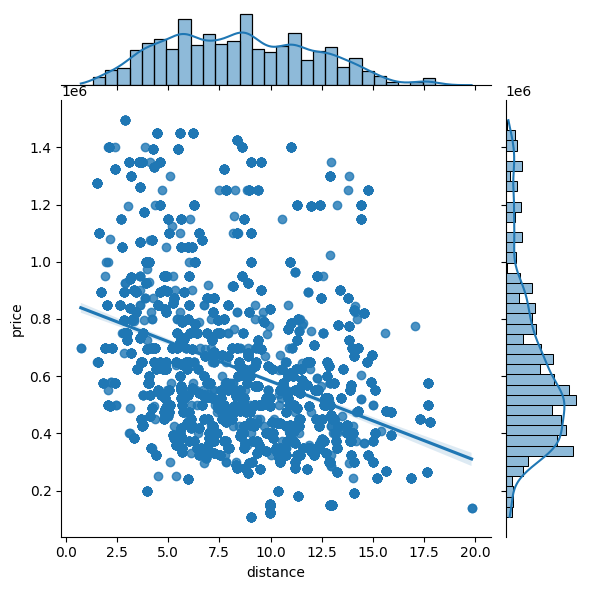

In [25]:
import seaborn as sns
g = sns.JointGrid(x="distance", y="price", 
                  data=dfsel.query(' 400 < area < 4000 and price < 1500000 and distance < 50'))

g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)


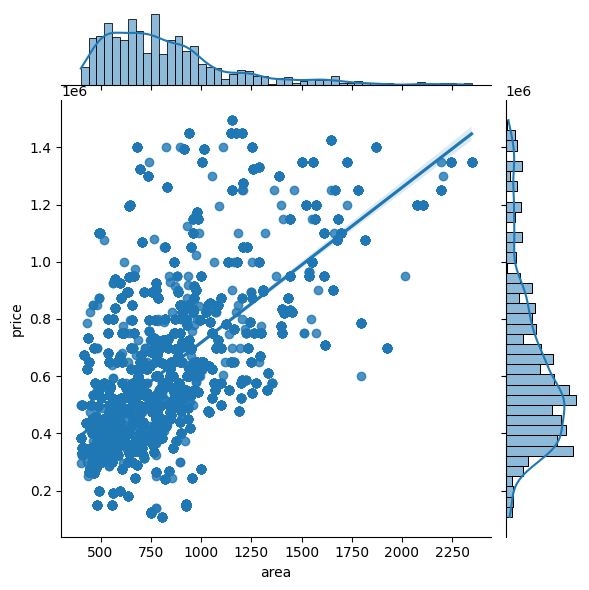

In [26]:
import seaborn as sns
g = sns.JointGrid(x="area", y="price", 
                  data=dfsel.query(' 400 < area < 4000 and price < 1500000 and distance < 50'))

g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)


In [27]:
dfsel['n_bedrooms_proc']

0       5
1       1
2       2
3       5
4       3
       ..
8332    2
8333    2
8334    1
8335    5
8336    2
Name: n_bedrooms_proc, Length: 8007, dtype: int64

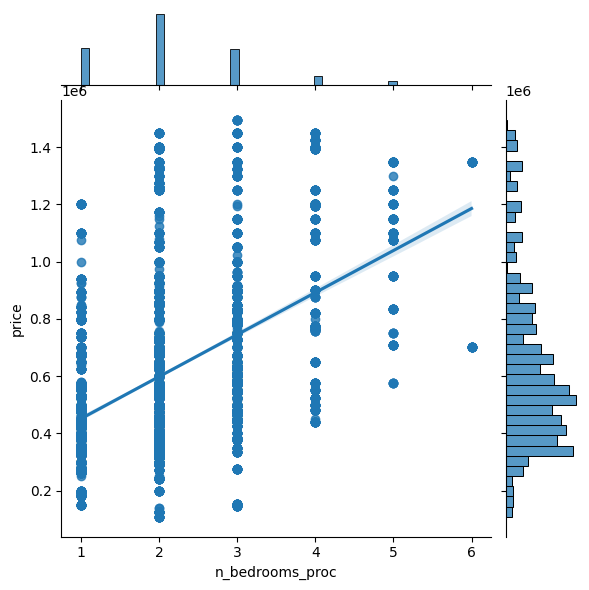

In [28]:
import seaborn as sns
g = sns.JointGrid(x="n_bedrooms_proc", y="price", 
                  data=dfsel.query(' 400 < area < 4000 and price < 1500000 and distance < 50'))

g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot)

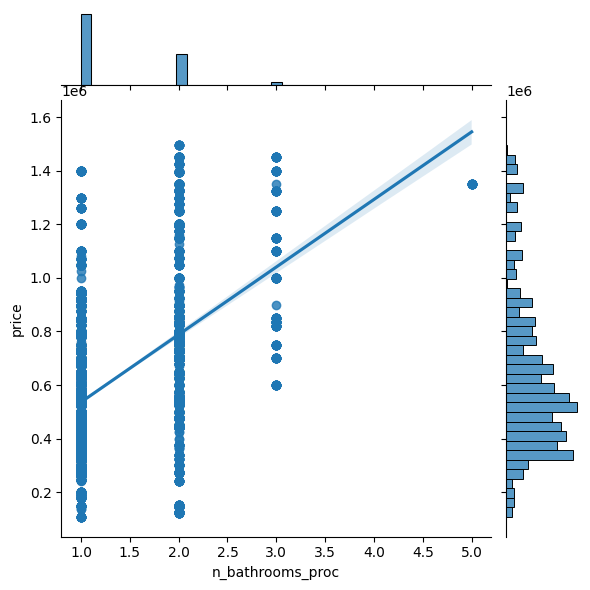

In [29]:
import seaborn as sns
g = sns.JointGrid(x="n_bathrooms_proc", y="price", 
                  data=dfsel.query(' 400 < area < 4000 and price < 1500000 and distance < 50'))

g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot)

NameError: name 'plt' is not defined

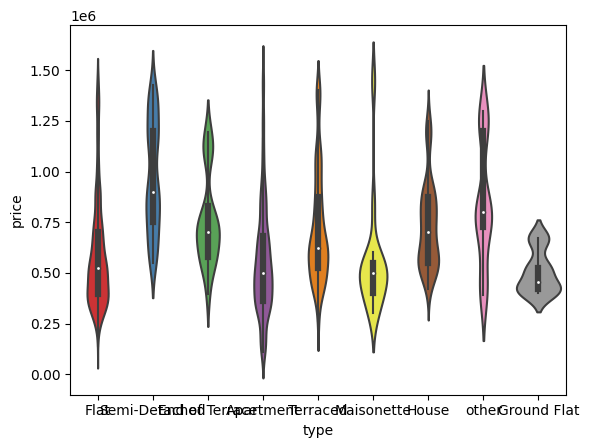

In [30]:
g = sns.violinplot(x="type", y="price", data=dfsel.query(' 400 < area < 4000 and price < 1500000 and distance < 50'),palette='Set1')
plt.xticks(rotation=45)

In [ ]:
g = sns.violinplot(x="type", y="area", data=dfsel.query(' 400 < area < 4000 and price < 1500000 and distance < 50'),palette='Set1')
plt.xticks(rotation=45)

In [ ]:
plt.rcParams['lines.markersize'] = 0.5
g = sns.PairGrid(
    dfsel[['price','area','distance','n_bedrooms_proc','n_bathrooms_proc']].query(' 400 < area < 4000 and price < 1500000 and distance < 50'))
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

In [ ]:
import seaborn as sns
g = sns.JointGrid(x="min_distance_to_station", y="price", 
                  data=dfsel.query(' 400 < area < 4000 and price < 1500000 and distance < 50'))

g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)

In [51]:
dfsel2 = dfsel.query(' 400 < area < 4000 and price < 1500000 and distance < 50')

dffinal = dfsel2.drop(['stations','n_bathrooms', 'n_bedrooms','price','long_lat'], axis=1)

In [35]:
pd.get_dummies(dffinal)

,area,min_distance_to_station,mean_distance_to_station,n_bedrooms_proc,n_bathrooms_proc,long,lat,distance,type_Apartment,type_End of Terrace,type_Flat,type_Ground Flat,type_House,type_Maisonette,type_Semi-Detached,type_Terraced,type_other
1,560.0,0.1,0.333333,1,1,-0.207893,51.514477,5.087209,0,0,1,0,0,0,0,0,0
2,978.0,0.2,0.333333,2,2,-0.184160,51.525395,3.821277,0,0,1,0,0,0,0,0,0
3,2196.0,0.3,0.733333,5,3,-0.131366,51.439614,7.831971,0,0,0,0,0,0,1,0,0
4,1057.0,0.2,0.433333,3,1,-0.098587,51.466691,5.438292,0,1,0,0,0,0,0,0,0
5,785.0,0.1,0.333333,2,2,-0.207833,51.496634,5.272443,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8331,544.0,0.4,0.566667,1,1,-0.038696,51.493188,6.941066,1,0,0,0,0,0,0,0,0
8332,885.0,0.2,0.533333,2,1,-0.100356,51.667577,17.698270,0,0,0,0,0,1,0,0,0
8333,840.0,0.7,0.700000,2,2,-0.210678,51.571759,8.651173,0,0,1,0,0,0,0,0,0
8334,408.0,0.5,0.600000,1,1,-0.036574,51.531627,7.241980,0,0,1,0,0,0,0,0,0


In [49]:
X = pd.get_dummies(dffinal).values
X = X /np.max(X,axis=0)
#X = dffinal[['n_bedrooms_proc','n_bathrooms_proc', 'area','distance']].values
y = dfsel2['price'].values

In [52]:
dfsel2.shape

(6306, 14)

In [40]:
import numpy as np
from sklearn.linear_model import LinearRegression


In [41]:
mreg = LinearRegression().fit(X, y)
mreg.score(X, y)


0.6145356101056217

In [53]:
len(X)

6306

In [62]:
from sklearn.model_selection import train_test_split
Xtrainval, Xtest, ytrainval, ytest = train_test_split(
     X, y, test_size=0.1, random_state=42)


In [63]:
from sklearn.model_selection import train_test_split
Xtrain, Xval, ytrain, yval = train_test_split(
     Xtrainval, ytrainval, test_size=0.1, random_state=40)


In [66]:
Xval.shape

(568, 17)

In [67]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0,n_estimators=1000,learning_rate=0.01,  max_depth=3
                               ,min_samples_split=40, min_samples_leaf=40)
reg.fit(Xtrain, ytrain)


reg.score(Xtest, ytest)

0.8558314944555929

In [68]:
np.sqrt( np.sum((reg.predict(Xtest)-ytest)**2)/ len(ytest))

114172.39397427098

In [69]:
100*np.sum((reg.predict(Xtest)-ytest)/ytest)/ len(ytest)

5.622501021263207

In [70]:
reg.score(Xtrain, ytrain)


0.8612045839737006

In [71]:
lreg = LinearRegression().fit(Xtrain, ytrain)
lreg.score(Xtrain, ytrain)


0.6165606326735089

In [72]:
reg.score(Xtest, ytest)


0.8558314944555929

In [73]:
100*np.sum((lreg.predict(Xtest)-ytest)/ytest)/ len(ytest)

9.027602732579101

In [74]:
from sklearn.neural_network import MLPRegressor

In [75]:
mreg = MLPRegressor(hidden_layer_sizes=(32,32,32,32), learning_rate_init=0.01).fit(Xtrain, ytrain)
mreg.score(Xtrain, ytrain)

/home/sutclw/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7118675518134886

In [76]:
mreg.score(Xtest, ytest)

0.7088445991648786

In [77]:
100*np.sum((mreg.predict(Xtest)-ytest)/ytest)/ len(ytest)

6.646974431082192

In [82]:
import tensorflow as tf

model = tf.keras.Sequential([
   # tf.keras.layers.Dense(32, activation='relu', kernel_regularizer='l2'),
   # tf.keras.layers.Dense(32, activation='relu', kernel_regularizer='l2'),
  #<  tf.keras.layers.Dense(32, activation='relu', kernel_regularizer='l2'),
    
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile( loss = tf.keras.losses.mean_squared_error, #mae stands for mean absolute error
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), #stochastic GD
              metrics = ['mse'])
model.fit( Xtrain, ytrain, epochs = 25,validation_data=(Xtest,ytest),)



Epoch 1/25
160/160 [==============================] - 0s 2ms/step - loss: 224226951168.0000 - mse: 224226951168.0000 - val_loss: 69244321792.0000 - val_mse: 69244321792.0000
Epoch 2/25
160/160 [==============================] - 0s 1ms/step - loss: 54018609152.0000 - mse: 54018609152.0000 - val_loss: 54610694144.0000 - val_mse: 54610694144.0000
Epoch 3/25
160/160 [==============================] - 0s 2ms/step - loss: 41845436416.0000 - mse: 41845436416.0000 - val_loss: 43526787072.0000 - val_mse: 43526787072.0000
Epoch 4/25
160/160 [==============================] - 0s 1ms/step - loss: 34666708992.0000 - mse: 34666708992.0000 - val_loss: 38250049536.0000 - val_mse: 38250049536.0000
Epoch 5/25
160/160 [==============================] - 0s 1ms/step - loss: 32552665088.0000 - mse: 32552665088.0000 - val_loss: 36636798976.0000 - val_mse: 36636798976.0000
Epoch 6/25
160/160 [==============================] - 0s 1ms/step - loss: 31353321472.0000 - mse: 31353321472.0000 - val_loss: 36167340032

In [83]:
ypred = model.predict(Xtest)

20/20 [==============================] - 0s 674us/step


In [84]:
np.mean( np.abs(ypred - ytest/1000.))

653812.6104595881

In [85]:
reg.predict(Xtest)

array([ 388706.14684302, 1047824.60284221,  979623.80079958,
        442500.97917135,  729761.11307462,  369614.34135972,
        812097.96044008,  733797.20883947,  616242.73494087,
        564778.49574694,  449923.22748372,  505072.92681185,
        562995.14186871,  420560.39130008,  288648.6012877 ,
        342816.02985191,  369614.34135972,  689650.78843271,
        410252.0738406 ,  329302.53125985,  431173.88227056,
        468775.41253627,  561825.0759468 ,  697521.80833968,
        363674.20388012,  357942.83710231,  690418.84300089,
        459406.25107703,  410639.5930765 ,  386564.5921446 ,
       1318316.6535015 ,  283546.31424062,  937879.22337779,
        354749.1060929 ,  455100.81575753,  764302.00069603,
        685929.31470146,  529846.79857838,  608749.4942084 ,
        369614.34135972,  538401.33377214, 1324683.68135285,
        950452.03457841,  392799.8358482 ,  358975.89111136,
        700053.38431971, 1167200.82857093,  412071.15074687,
        666355.54993696,

In [87]:
100*np.mean(np.abs(mreg.predict(Xtest)-ytest)/ytest)

21.290225028767374

In [92]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 9.0 MB/s eta 0:00:00m eta 0:00:010:00:01


In [104]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV 

In [139]:
xgb = XGBRegressor(random_state = 1)

xgb.fit(Xtrain,ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=1, ...)

In [126]:
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.score))
    print('Best Parameters: ' + str(classifier.best_params_))

xgb = XGBRegressor(random_state = 1)

param_grid = {
    'n_estimators': [400,500,600],
    #'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [3,4,5],
    'reg_alpha': [1],
    #'reg_lambda': [2, 5, 10],
    #'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.1,0.2,0.3],
    #'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_reg_xgb = clf_xgb.fit(Xtrain,ytrain)
clf_performance(best_reg_xgb,'XGB')


Fitting 5 folds for each of 27 candidates, totalling 135 fits
XGB
Best Score: <bound method BaseSearchCV.score of GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    m

In [128]:
clf_performance(best_reg_xgb,'XGB')


XGB
Best Score: <bound method BaseSearchCV.score of GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                  

In [127]:
best_reg_xgb.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 0.01,
 'n_estimators': 600,
 'reg_alpha': 1,
 'sampling_method': 'uniform'}

In [94]:
xgb = XGBRegressor()
xgb.fit(Xtrain, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [130]:
100*np.mean(np.abs(best_reg_xgb.predict(Xtest)-ytest)/ytest)

2.4184026841935182

Text(0.5, 0, 'Percentage uncertainty on price')

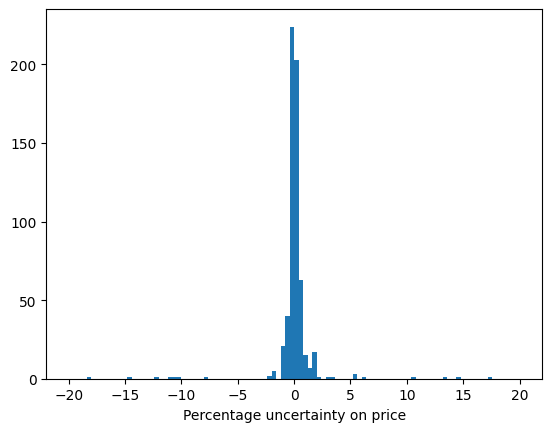

In [135]:
plt.hist(100*(best_reg_xgb.predict(Xtest)-ytest)/ytest, bins=100, range=(-20,20))
plt.xlabel('Percentage uncertainty on price')

In [144]:
100*np.mean(np.abs(xgb.predict(Xval)-yval)/yval)

2.071580355084926

<AxesSubplot:>

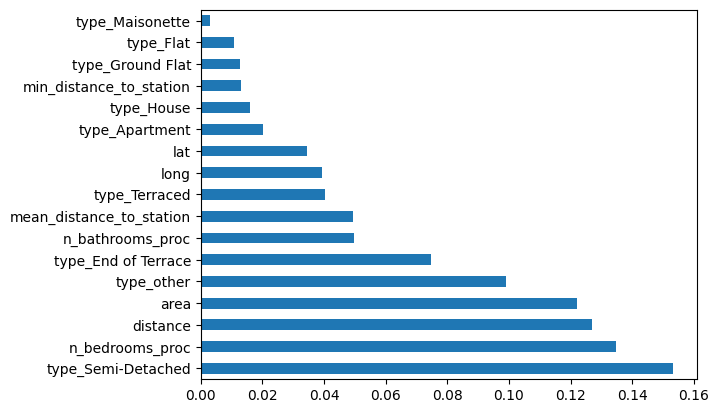

In [140]:

feat_importances = pd.Series(xgb.feature_importances_, index=pd.get_dummies(dffinal).columns)
feat_importances.nlargest(20).plot(kind='barh')

Text(0, 0.5, 'predicted price')

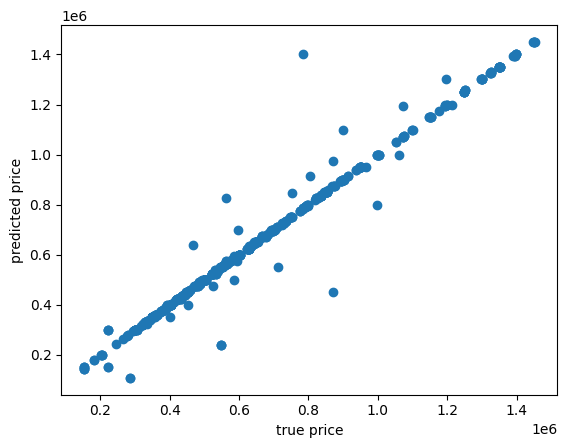

In [141]:
import matplotlib.pyplot as plt
plt.scatter(best_reg_xgb.predict(Xtest),ytest)
plt.xlabel('true price')
plt.ylabel('predicted price')

Text(0, 0.5, 'predicted price')

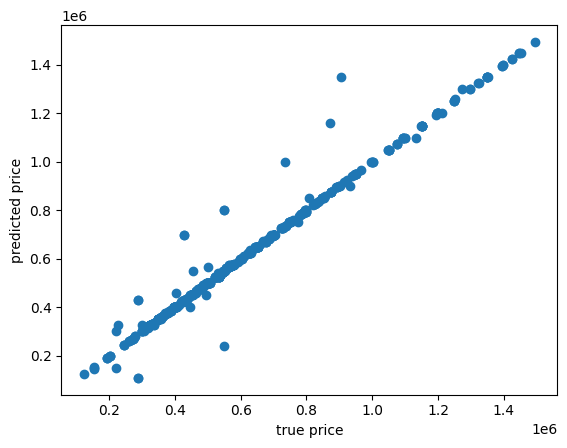

In [145]:
import matplotlib.pyplot as plt
plt.scatter(best_reg_xgb.predict(Xval),yval)
plt.xlabel('true price')
plt.ylabel('predicted price')